In [2]:
# 1.1 Load the dataset and display the first 10 rows

# Import the pandas library
import pandas as pd

# Load the dataset using the semicolon (;) as the separator
howell_full = pd.read_csv("Howell.csv", sep=";")

# Display basic information about the dataset
howell_full.info()

# Display the first 10 rows of the dataset
print(howell_full.head(n=10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0
5  163.830  62.992589  35.0     1
6  149.225  38.243476  32.0     0
7  168.910  55.479971  27.0     1
8  147.955  34.869885  19.0     0
9  165.100  54.487739  54.0     1


In [3]:
# 1.2 Check for missing values and display summary statistics

# Show first 10 rows
print("First 10 rows:")
print(howell_full.head(10))

# Show summary statistics
print("\nSummary statistics:")
print(howell_full.describe())

# Show correlation matrix
print("\nCorrelation matrix:")
print(howell_full.corr())


First 10 rows:
    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0
5  163.830  62.992589  35.0     1
6  149.225  38.243476  32.0     0
7  168.910  55.479971  27.0     1
8  147.955  34.869885  19.0     0
9  165.100  54.487739  54.0     1

Summary statistics:
           height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000

Correlation matrix:
          height    weight       age      male
height  1.000000  0.940822  0.683689

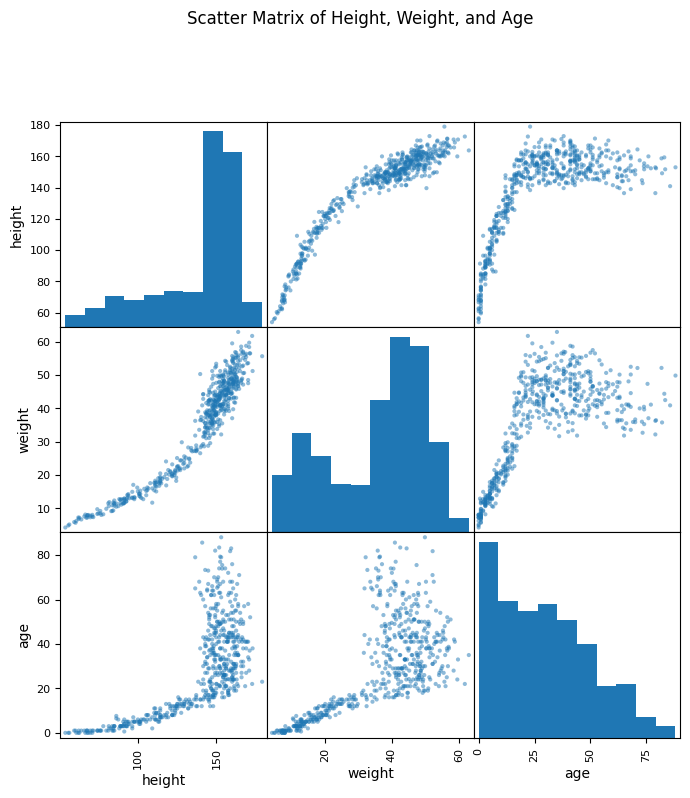

In [4]:
# 2.1 Explore data patterns and distributions

# Import scatter_matrix utility
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Select features of interest
attributes = ['height', 'weight', 'age']

# Create scatter matrix plot
scatter_matrix(howell_full[attributes], figsize=(8, 8))
plt.suptitle("Scatter Matrix of Height, Weight, and Age", y=1.02)
plt.show()


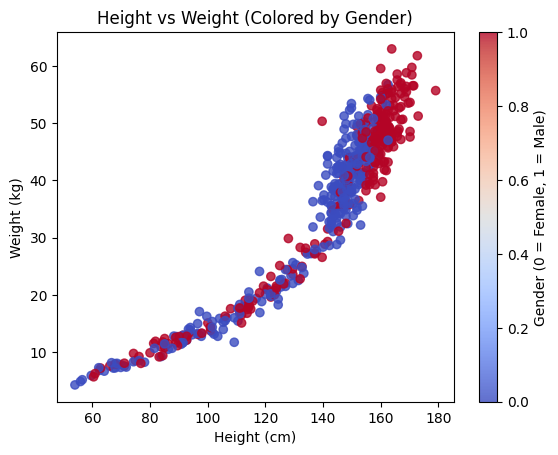

In [5]:
# 2.2 Scatter Plot: Height vs Weight (Colored by Gender)

import matplotlib.pyplot as plt

# Extract columns
height = howell_full['height']
weight = howell_full['weight']
gender = howell_full['male']  # 1 = male, 0 = female

# Create the scatter plot with color by gender
scatter = plt.scatter(height, weight, c=gender, cmap='coolwarm', alpha=0.8)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight (Colored by Gender)')
plt.colorbar(scatter, label='Gender (0 = Female, 1 = Male)')
plt.show()

In [6]:
# 2.2 Handle missing values and clean data

# Create a new feature combining 'male' and 'age'
howell_full['new'] = howell_full['male'] + howell_full['age']

# Drop the newly created 'new' column (just an example)
howell_full.drop(axis='columns', labels='new', inplace=True)

# Calculate the median of height
height_median = howell_full['height'].median()

# Calculate the average (mean) of weight
weight_average = howell_full['weight'].mean()

# Fill missing values in height column with the median
howell_full['height'].fillna(height_median, inplace=True)


/var/folders/02/57dqfrgx6zzfw_sgv9yyk60c0000gn/T/ipykernel_5793/1454343497.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  howell_full['height'].fillna(height_median, inplace=True)


In [7]:
# Compute BMI based on metric units
def bmi(height, weight):
    return 10000 * weight / (height ** 2)

print("Example BMI for 150cm / 40kg:", bmi(150, 40))

new_feature = bmi(howell_full['height'], howell_full['weight'])
print("BMI values:", new_feature.head())
howell_full['bmi'] = new_feature

# Show first 10 rows to verify
howell_full.head(10)


Example BMI for 150cm / 40kg: 17.77777777777778
BMI values: 0    20.764297
1    18.695244
2    17.095718
3    21.561444
4    19.520384
dtype: float64


,height,weight,age,male,bmi
0,151.765,47.825606,63.0,1,20.764297
1,139.700,36.485807,63.0,0,18.695244
2,136.525,31.864838,65.0,0,17.095718
3,156.845,53.041914,41.0,1,21.561444
4,145.415,41.276872,51.0,0,19.520384
5,163.830,62.992589,35.0,1,23.469433
6,149.225,38.243476,32.0,0,17.174108
7,168.910,55.479971,27.0,1,19.445786
8,147.955,34.869885,19.0,0,15.929099
9,165.100,54.487739,54.0,1,19.989625


In [8]:
# 2.3 Feature Engineering — Add BMI Category

import numpy as np

# Define a BMI categorization function
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    if bmi < 25.0:
        return 'Normal'
    if bmi < 30.0:
        return 'Overweight'
    return 'Obese'

# Vectorize the function
vector_bmi_category = np.vectorize(bmi_category)

# Apply it to the BMI column and create a new column 'bmi class'
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])

# Show first 10 rows to verify
print(howell_full.head(n=10))

# Show counts of each BMI category
print("\nBMI Class Counts:")
print(howell_full['bmi class'].value_counts())
howell_full['bmi class'].value_counts()


    height     weight   age  male        bmi    bmi class
0  151.765  47.825606  63.0     1  20.764297       Normal
1  139.700  36.485807  63.0     0  18.695244       Normal
2  136.525  31.864838  65.0     0  17.095718  Underweight
3  156.845  53.041914  41.0     1  21.561444       Normal
4  145.415  41.276872  51.0     0  19.520384       Normal
5  163.830  62.992589  35.0     1  23.469433       Normal
6  149.225  38.243476  32.0     0  17.174108  Underweight
7  168.910  55.479971  27.0     1  19.445786       Normal
8  147.955  34.869885  19.0     0  15.929099  Underweight
9  165.100  54.487739  54.0     1  19.989625       Normal

BMI Class Counts:
bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64


bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

### Visualizing Age vs BMI (Colored by Gender)

We create a scatter plot of `age` vs `bmi`, with color representing gender (`male` column).
This helps us explore whether there are patterns in BMI across ages and between genders.


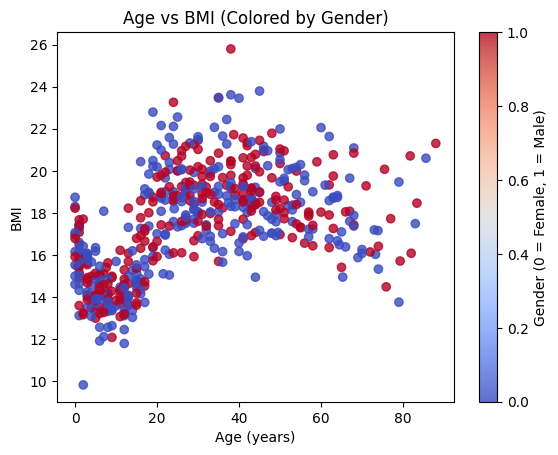

In [9]:
# Visualizing Age vs BMI (Colored by Gender)

import matplotlib.pyplot as plt

# Extract data
age = howell_full['age']
bmi = howell_full['bmi']
gender = howell_full['male']  # 0 = female, 1 = male

# Scatter plot with gender color mapping
scatter = plt.scatter(age, bmi, c=gender, cmap='coolwarm', alpha=0.8)
plt.xlabel('Age (years)')
plt.ylabel('BMI')
plt.title('Age vs BMI (Colored by Gender)')
plt.colorbar(scatter, label='Gender (0 = Female, 1 = Male)')
plt.show()


### Split the Data by Age

Since data patterns often vary between children and adults, we split the dataset using age 18 as a cutoff.  
Depending on the modeling goals, we may work with just one group or the full dataset.

1. We apply a Boolean condition (`age > 18`) to create a mask.
2. We use that mask to filter the DataFrame into `howell_adults` and `howell_children`.
3. The `~` symbol is used to invert the Boolean mask.
4. We display the number of instances and a preview of each new subset.

In [12]:
# Split the Data by Age

# Create a Boolean mask where age is greater than 18
over18 = howell_full["age"] > 18
print("Age > 18 mask (True = adult, False = child):")
print(over18)

# Split the data based on the mask
howell_adults = howell_full[over18]
howell_children = howell_full[~over18]  # ~ inverts the mask

# Display counts and previews
print("\nThere are", len(howell_adults), "adult instances:")
print(howell_adults.head())

print("\nThere are", len(howell_children), "child instances:")
print(howell_children.head())


Age > 18 mask (True = adult, False = child):
0       True
1       True
2       True
3       True
4       True
       ...  
539    False
540     True
541     True
542    False
543     True
Name: age, Length: 544, dtype: bool

There are 346 adult instances:
    height     weight   age  male        bmi    bmi class
0  151.765  47.825606  63.0     1  20.764297       Normal
1  139.700  36.485807  63.0     0  18.695244       Normal
2  136.525  31.864838  65.0     0  17.095718  Underweight
3  156.845  53.041914  41.0     1  21.561444       Normal
4  145.415  41.276872  51.0     0  19.520384       Normal

There are 198 child instances:
    height     weight   age  male        bmi    bmi class
18  121.92  19.617854  12.0     1  13.197801  Underweight
19  105.41  13.947954   8.0     0  12.552981  Underweight
20   86.36  10.489315   6.5     0  14.064421  Underweight
23  129.54  23.586784  13.0     1  14.055974  Underweight
24  109.22  15.989118   7.0     0  13.403560  Underweight


### Section 3: Train/Test Split (Basic)

We now split the `howell_adults` dataset into **training and test sets** using `train_test_split` from Scikit-learn.

Steps:
1. Split `howell_adults` into 80% training and 20% testing sets.
2. Display the number of records in each split.
3. Compare the distribution of the `male` feature in:
   - Full `howell_adults`
   - `train_set`
   - `test_set`


In [13]:
# Section 3: Train/Test Split

from sklearn.model_selection import train_test_split

# Split howell_adults into training and test sets (80% / 20%)
train_set, test_set = train_test_split(howell_adults, test_size=0.2, random_state=123)

# Display sizes
print('Train size:', len(train_set), 'Test size:', len(test_set))

# Compare gender distribution
print('\nAdult gender counts:')
print(howell_adults['male'].value_counts())

print('\nTrain gender counts:')
print(train_set['male'].value_counts())

print('\nTest gender counts:')
print(test_set['male'].value_counts())


Train size: 276 Test size: 70

Adult gender counts:
male
0    182
1    164
Name: count, dtype: int64

Train gender counts:
male
0    141
1    135
Name: count, dtype: int64

Test gender counts:
male
0    41
1    29
Name: count, dtype: int64


In [15]:
# Stratified Train/Test Split

from sklearn.model_selection import StratifiedShuffleSplit

# Create the splitter object
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# Perform the stratified split
for train_indices, test_indices in splitter.split(howell_adults, howell_adults['male']):
    train_set = howell_adults.iloc[train_indices]
    test_set = howell_adults.iloc[test_indices]

# Display sizes
print('Train size:', len(train_set), '| Test size:', len(test_set))

# Compare gender distribution
print('\nAdult gender distribution:')
male_ratio = howell_adults['male'].value_counts(normalize=True).round(3)
print(male_ratio.rename(index={1: 'Male', 0: 'Female'}))

print('\nTrain gender distribution:')
train_ratio = train_set['male'].value_counts(normalize=True).round(3)
print(train_ratio.rename(index={1: 'Male', 0: 'Female'}))

print('\nTest gender distribution:')
test_ratio = test_set['male'].value_counts(normalize=True).round(3)
print(test_ratio.rename(index={1: 'Male', 0: 'Female'}))


Train size: 276 | Test size: 70

Adult gender distribution:
male
Female    0.526
Male      0.474
Name: proportion, dtype: float64

Train gender distribution:
male
Female    0.525
Male      0.475
Name: proportion, dtype: float64

Test gender distribution:
male
Female    0.529
Male      0.471
Name: proportion, dtype: float64
